### Import Statement

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import clone_model

import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Data Preprocessing:

#### Load the CIFAR-10 dataset.  


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#### Perform necessary data preprocessing steps:  
  - Normalize pixel values to range between 0 and 1.  
  - Convert class labels into one-hot encoded format.  
  - Split the dataset into training and test sets (e.g., 50,000 images for
training and 10,000 for testing).  
  - Optionally, apply data augmentation techniques (such as random
flips, rotations, or shifts) to improve the generalization of the
model.


In [3]:
# Since the max value of a pixel is 255, we want to normalize it to 0-1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class labels to one-hot encoded format
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

### 2. Network Architecture Design:
#### Design a feedforward neural network to classify the images.  
▪ Input Layer: The input shape should match the 32x32x3
dimensions of the CIFAR-10 images.  
▪ Hidden Layers: Use appropriate layers.  
▪ Output Layer: The final layer should have 10 output neurons (one
for each class) with a softmax activation function for multi-class
classification.

In [4]:
# Define the model
model = Sequential()

# Input Layer: Convolutional Layer
model.add(Flatten(input_shape=(32, 32, 3)))

### Question:
#### Justify your choice of network architecture, including the number of layers, types of layers, and the number of neurons/filters in each layer.

- Input Layer: The first layer is a flatten layer that takes input images of shape (32, 32, 3) or a 2D image and converts it into a 1D array. This makes it easier to process by the Deep Learning Models.
- Hidden Layers:  
Two Hidden layers are used with ReLU and tanh activations with 512 and 256 neurons respectively.
- Output Layer: A dense layer with 10 neurons (for each class) and softmax activation ensures multi-class classification, outputting a probability distribution.

### 3. Activation Functions:
#### Choose any two appropriate activation functions for the hidden layers (e.g., ReLU, sigmoid, or tanh).

In [5]:
# Hidden Layer 1: Fully connected layer with 512 neurons, using ReLU activation
model.add(Dense(512, activation='relu'))

# Dropping 20% of the neurons
model.add(Dropout(0.2))

# Hidden Layer 2: Fully connected layer with 256 neurons, using Tanh activation
model.add(Dense(256, activation='tanh'))

# Dropping 30% of the neurons
model.add(Dropout(0.3))

# Output Layer: Fully Connected layer with 10 output neurons.
model.add(Dense(10, activation='softmax'))

####Explain why you selected a particular activation function and its role in the backpropagation process.
ReLU (Rectified Linear Unit):
It is chosen because it's simple and fast, turning negative values to zero and keeping positive ones unchanged. This helps avoid slow learning in deeper networks, as it prevents very small gradients (the vanishing gradient problem). In backpropagation, ReLU's derivative is 1 for positive inputs and 0 for negative ones, making it easier for the network to learn by allowing bigger updates for active neurons.

Tanh (Hyperbolic Tangent):
Tanh is selected because it gives outputs between -1 and 1, which helps the network learn both positive and negative patterns. It's useful when we want more balanced outputs. During backpropagation, tanh allows good gradient flow for inputs near zero but can slow learning for very large or small inputs due to small gradients. Despite this, it helps capture more detailed features in the network.

### 4. Loss Function and Optimizer:
####Use any two loss functions and compare with the categorical cross entropy since this is a multi-class classification problem.
####Select an appropriate optimizer (e.g., SGD, Adam, RMSprop) and explain how the learning rate affects the backpropagation process.

In [6]:
categorical_loss = clone_model(model)
mse_loss = clone_model(model)
kld_loss = clone_model(model)

categorical_loss.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mse_loss.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
kld_loss.compile(optimizer='adam', loss='kullback_leibler_divergence', metrics=['accuracy'])

### Question:
#### How does the choice of optimizer and learning rate influence the convergence of the network? How would you adjust the learning rate if the model is not converging properly?

Adam is a popular and effective optimizer chosen for this model due to its ability to adapt the learning rate for each parameter individually. It combines the benefits of two other optimizers: momentum (which helps accelerate learning by smoothing gradients) and RMSprop (which adapts the learning rate based on the recent magnitude of gradients)

The learning rate controls how much the model's weights are updated during backpropagation. If the learning rate is too high, the updates will be large, and the model may overshoot the optimal weights, failing to converge. If the learning rate is too low, the updates will be very small, leading to slow learning and possibly getting stuck in a local minimum. Adam automatically adjusts the learning rate for each weight during training, which helps in achieving faster convergence while maintaining stability.

If the model is not converging properly, we can:
1. Decrease the Learning Rate.
2. Use a Learning Rate schedule.
3. Increase the Learning Rate.



### 5. Training the Model:
####Implement backpropagation to update the weights and biases of the network during training.
####Train the model for a fixed number of epochs (e.g., 50 epochs) and monitor the training and validation accuracy.

In [7]:
epochs = 50
history_categorical = categorical_loss.fit(x_train, y_train,
                                           epochs = epochs,
                                           batch_size=32,
                                           validation_data=(x_test, y_test))

history_mse = mse_loss.fit(x_train, y_train,
                           epochs = epochs,
                           batch_size=32,
                           validation_data=(x_test, y_test))

history_kld = kld_loss.fit(x_train, y_train,
                           epochs = epochs,
                           batch_size=32,
                           validation_data=(x_test, y_test))

Epoch 1/50
1563/1563 [==============================] - 13s 8ms/step - loss: 2.1697 - accuracy: 0.2205 - val_loss: 1.9018 - val_accuracy: 0.3006
Epoch 2/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.8930 - accuracy: 0.3007 - val_loss: 1.7512 - val_accuracy: 0.3584
Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.8173 - accuracy: 0.3357 - val_loss: 1.6870 - val_accuracy: 0.3843
Epoch 4/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.7794 - accuracy: 0.3496 - val_loss: 1.6649 - val_accuracy: 0.3947
Epoch 5/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.7555 - accuracy: 0.3582 - val_loss: 1.6504 - val_accuracy: 0.4017
Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.7393 - accuracy: 0.3644 - val_loss: 1.6143 - val_accuracy: 0.4117
Epoch 7/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.7242 - accuracy: 0.3717 - val_loss: 1.6347 - val_ac

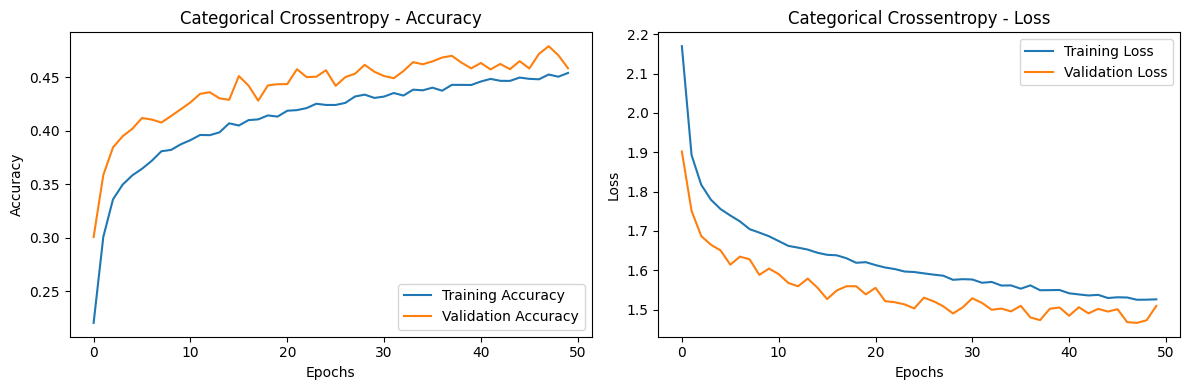

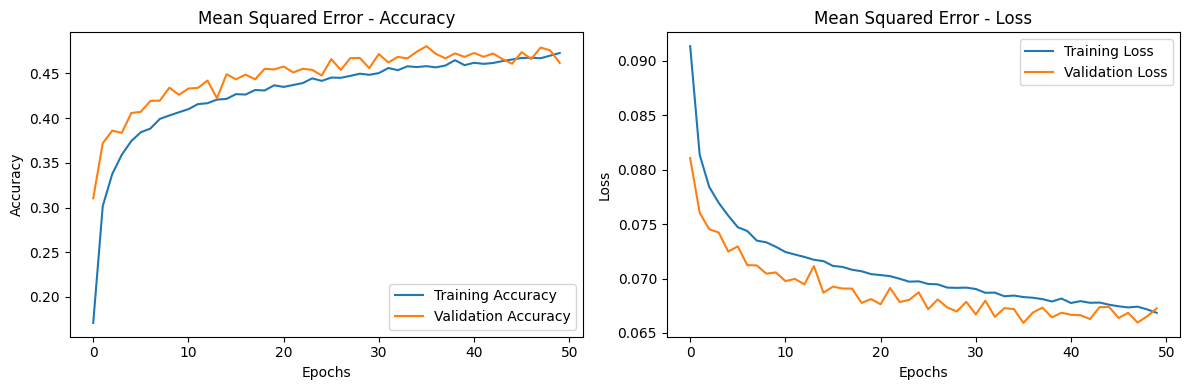

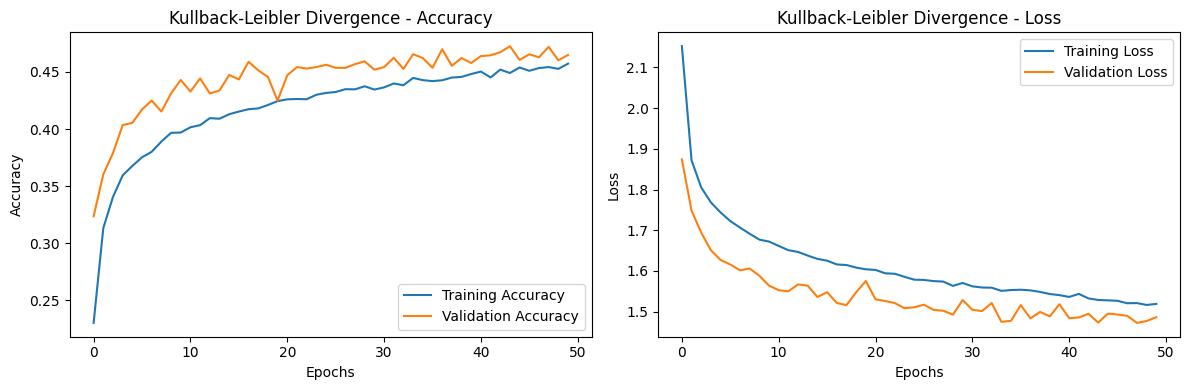

In [8]:
def plot_training(history, title):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the results for each loss function
plot_training(history_categorical, 'Categorical Crossentropy')
plot_training(history_mse, 'Mean Squared Error')
plot_training(history_kld, 'Kullback-Leibler Divergence')

###Question:
#### How does backpropagation update the weights in each layer, and what role does the learning rate play in this process?

Backpropagation updates the weights in each layer of a neural network by calculating the error between the predicted output and the actual output, then propagating this error backward through the network. During this process, the gradients of the loss function with respect to each weight are computed using the chain rule. The weights are then adjusted in the opposite direction of these gradients to reduce the loss. The learning rate plays a crucial role in this process by controlling the size of these weight updates. If the learning rate is too high, the updates can be too large, causing the model to overshoot and become unstable. If it's too low, the updates are very small, leading to slow learning. Thus, finding the right learning rate is essential for effective training and convergence of the model.








### 6. Model Evaluation:
####After training, evaluate the performance of your model on the test set.
####Calculate accuracy, precision, recall, F1-score, and the confusion matrix to understand the model’s classification performance.


In [9]:
# Function to evaluate the model
def evaluate_model(model, x_test, y_test, model_name):
    y_pred_probs = model.predict(x_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Calculate accuracy
    accuracy = np.mean(y_pred == y_true)

    # Print classification report
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_true, y_pred, target_names=[str(i) for i in range(10)]))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[str(i) for i in range(10)],
                yticklabels=[str(i) for i in range(10)])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

313/313 [==============================] - 1s 2ms/step
Classification Report for Categorical Crossentropy:

              precision    recall  f1-score   support

           0       0.50      0.56      0.53      1000
           1       0.48      0.72      0.58      1000
           2       0.31      0.43      0.36      1000
           3       0.31      0.38      0.34      1000
           4       0.38      0.39      0.39      1000
           5       0.42      0.31      0.35      1000
           6       0.60      0.32      0.42      1000
           7       0.62      0.43      0.51      1000
           8       0.64      0.58      0.61      1000
           9       0.52      0.46      0.49      1000

    accuracy                           0.46     10000
   macro avg       0.48      0.46      0.46     10000
weighted avg       0.48      0.46      0.46     10000



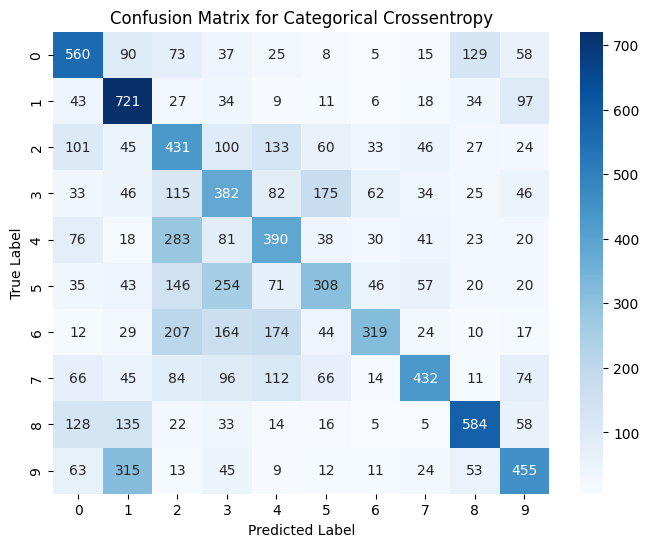

In [10]:
# For Categorical Crossentropy
evaluate_model(categorical_loss, x_test, y_test, 'Categorical Crossentropy')

313/313 [==============================] - 1s 2ms/step
Classification Report for Mean Squared Error:

              precision    recall  f1-score   support

           0       0.62      0.45      0.52      1000
           1       0.71      0.41      0.52      1000
           2       0.33      0.38      0.36      1000
           3       0.33      0.32      0.32      1000
           4       0.44      0.29      0.35      1000
           5       0.32      0.42      0.37      1000
           6       0.47      0.58      0.52      1000
           7       0.59      0.44      0.50      1000
           8       0.55      0.69      0.61      1000
           9       0.46      0.64      0.54      1000

    accuracy                           0.46     10000
   macro avg       0.48      0.46      0.46     10000
weighted avg       0.48      0.46      0.46     10000



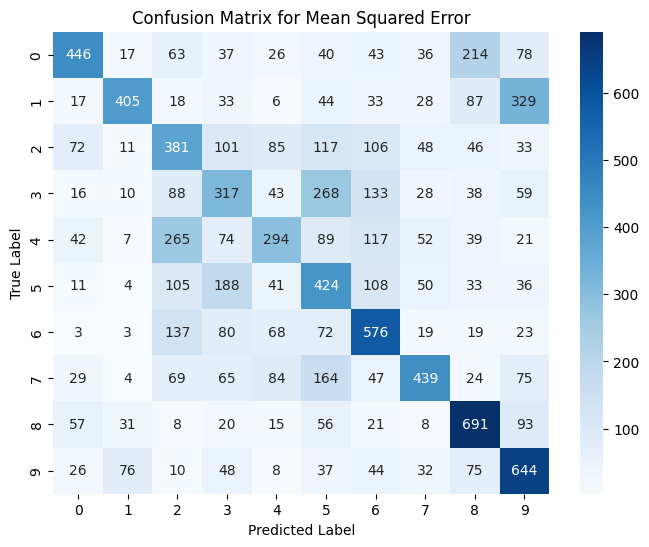

In [11]:
# For MSE
evaluate_model(mse_loss, x_test, y_test, 'Mean Squared Error')

313/313 [==============================] - 1s 2ms/step
Classification Report for Kullback-Leibler Divergence:

              precision    recall  f1-score   support

           0       0.55      0.47      0.50      1000
           1       0.56      0.64      0.59      1000
           2       0.28      0.46      0.35      1000
           3       0.32      0.32      0.32      1000
           4       0.43      0.26      0.32      1000
           5       0.47      0.19      0.27      1000
           6       0.43      0.63      0.51      1000
           7       0.61      0.50      0.55      1000
           8       0.57      0.67      0.61      1000
           9       0.55      0.52      0.53      1000

    accuracy                           0.46     10000
   macro avg       0.48      0.46      0.46     10000
weighted avg       0.48      0.46      0.46     10000



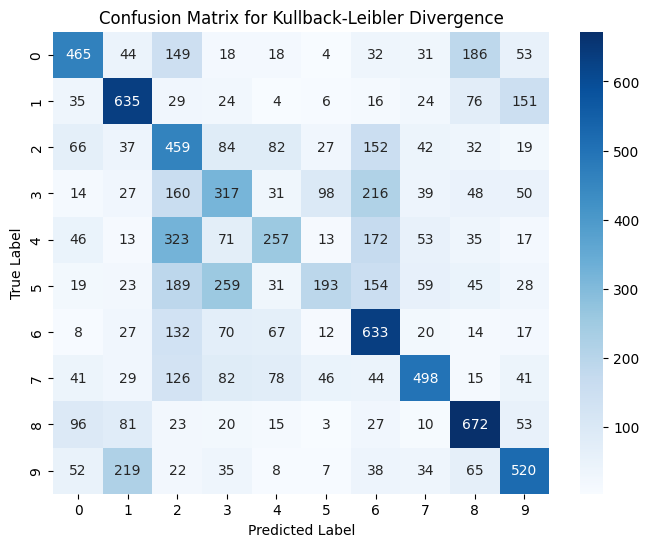

In [12]:
# For KL Divergence
evaluate_model(kld_loss, x_test, y_test, 'Kullback-Leibler Divergence')

###Question:
####How can you further improve model performance if the accuracy is low?
We can use the following techniquest to increase model performance:-  
1. Data Augmentation: Increase training data variety by applying transformations like flipping, rotating, or zooming images. This helps the model learn from different perspectives.

2. Hyperparameter Tuning: Change settings like learning rate, batch size, and the number of layers in the model. Testing different values can help find what works best.

3. Regularization Techniques: Use methods like dropout to prevent overfitting, which happens when the model learns too much from the training data and fails on new data.

4. Use Pretrained Models: Take advantage of models that have already been trained on similar tasks. Fine-tuning these models can improve performance without starting from scratch.

5. Increase Training Data: Gather more training data if possible. More data can help the model generalize better.

6. Change the Model Architecture: If the current model isn't working well, try using a more complex one with additional layers or different types of layers.

###7. Optimization Strategies:
####Discuss optimization strategies such as:  
▪ Early stopping to prevent overfitting.  
▪ Learning rate scheduling for smoother convergence.  
▪ Weight initialization techniques to ensure efficient learning.

1. Early Stopping: Early stopping helps prevent overfitting during training. It monitors the model's performance on a validation set and stops training if the validation loss doesn't improve for a set number of epochs. This way, the model doesn't learn noise from the training data, allowing it to perform better on new, unseen data.

2. Learning Rate Scheduling: Learning rate scheduling adjusts the learning rate during training to help the model converge more smoothly. Starting with a higher learning rate helps the model learn quickly, and gradually lowering it allows for finer adjustments as it gets closer to the best solution. Common methods include reducing the learning rate at set intervals, decreasing it exponentially, or lowering it when performance plateaus.

3. Weight Initialization Techniques: Properly initializing weights is important for effective learning. If weights are not initialized well, the model might learn slowly or not at all.

### Question:
####Why is weight initialization important, and how does it impact the convergence of your network?
Weight initialization is important in neural networks because it sets the starting point for learning. If all weights are initialized to the same value, like zero, every neuron in a layer will behave the same way and learn the same features, which isn't helpful. Proper initialization ensures that different neurons can learn different patterns. Additionally, the way weights are initialized affects the activations in the network. If the weights are too small, activations can become very close to zero, causing the "vanishing gradient" problem, which makes learning difficult. If the weights are too large, it can lead to exploding activations, making the training unstable. Good weight initialization keeps activations within a reasonable range, allowing the network to learn effectively.



###8. Report:
####Provide a detailed report/documentation that includes (in Colab file):
▪ The architecture of the network and justifications for the choices
made.  
▪ Training and test accuracy with relevant plots showing loss and
accuracy over the epochs.  
▪ Hyperparameter values used (learning rate, batch size, number of
epochs, etc.).  
▪ A brief discussion of the challenges you faced and how you
addressed them.

#### The architecture of the network and justifications for the choices made.
- Input Layer: The first layer is a flatten layer that takes input images of shape (32, 32, 3) or a 2D image and converts it into a 1D array. This makes it easier to process by the Deep Learning Models.
- Hidden Layers:
Two Hidden layers are used with ReLU and tanh activations with 512 and 256 neurons respectively.
- Output Layer: A dense layer with 10 neurons (for each class) and softmax activation ensures multi-class classification, outputting a probability distribution.

#### Training and test accuracy with relevant plots showing loss and accuracy over the epochs.
From my Model, the accuracy Increased over time while my loss decreased. It was not steady but finally slowed down. After 50 epochs, I finally got an accuracy of 46% across all models with different loss functions.

#### Hyperparameter values used (learning rate, batch size, number of epochs, etc.).

For learning rate, I did not specify any learning rate while specifying my optimizer. Since i used adam optimizer, a learning rate of 0.001 was taken.
For Batch Size, i took a batch of 32 elements at once. For number of epochs, I ran my model for 50 epochs.
For my loss functions, i ran 3 loss functions and compared their results.
However, they provided the same accuracy after 50 epochs.

#### A brief discussion of the challenges you faced and how you addressed them.
- As the dataset was large an I had to train the data on 50 epochs. I wasted alot of time correcting my code and rerunning the 50 epochs. So i reduced the epochs to 5, ran my code, fixed my errors and then changed the epochs to 50. I also needed to run 3 loss functions which increased the overall runtime of my program.

- Since i needed to run 3 loss functions, I could not use the same model. So i made a copy of it using `clone model` and worked on the clones.